# Titanic Dataset Exploratory Data Analysis

## The question I am trying to solve: "Can we predict survivors on the titanic on data?"

### 1) Read the dataset, have a look at it, see its characteristics (size, shape, variables, types of the variables, missing values etc). Also have a look at what variable you would find useful later for your prediction and in broad terms what type of prediction would this be.

Import necessary packages

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

Import the data and look at the first rows

In [13]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
train.shape

(891, 12)

The dataset has 891 rows and 12 columns. Looking at the columns:

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [16]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The types of data:
- PassengerId - numerical data (int)
- Survived - categorical data, binary (int) - numerical????
- Pclass - categorical data, 3 categories (int) - numerical????
- Name - NOT SURE (object)
- Sex - categorical, binary (object)
- Age - numerical (float)
- SibSp - numerical (int)
- Parch - numerical (int)
- Ticket - NOT SURE
- Fare - numerical (float)
- Cabin - NOT SURE (object)
- Embarked - categorical, 3 categories (object)

There seems to be 3 of the 12 columns that have null/missing data (Age, Cabin, Embarked).

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe() method is not necessarily useful in this care as the only statistics that make sens here are for Age column, Fare and maybe Survived. It can be seen that the percentage for passengers that survived is 38.38%, the mean age of passengers is approximately 26.7 years and 

Is survived the only dependent variable? Yes! (y)
Survived is a categorical, binary variable -> classification prediction algorithms!

In [19]:
train["Survived"].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

### 2) Choose the features that you think might have an impact on the dependent variable and look at them one by one. Look for:
- what it is describing and the format of the data
- distribution of variable (normal/skewed, outliers, what do missing values look like, weird entries)

For quantitative variables, look at:
- central tendency: mean, median, mode, trimmed mean + visualize them
- spread: range, IQR, variance, SD, MAD + visualize

For categorical variables, look at: 
- frequency + visualize (histogram - box plot)


### Starting with the numerical values. 

I will only keep:

- Age - numerical (float)
- SibSp - numerical (int)
- Parch - numerical (int)
- Fare - numerical (float)

As PassengerId might not be relevant for the prediction of survival. 

In [20]:
# age 


### 3) Visualize the data for variables, in relation to one another.

<AxesSubplot:xlabel='Sex', ylabel='count'>

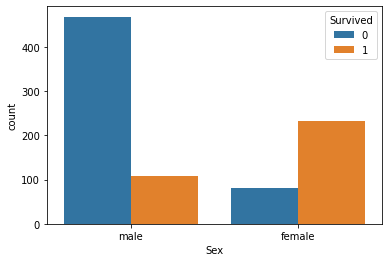

In [21]:
sns.countplot(data=train, x="Sex", hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

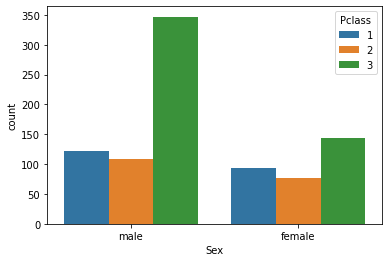

In [22]:
sns.countplot(data=train, x="Sex", hue="Pclass")

### 4) Feature engineering. Name is not necessarily an useful feature of this dataset, but the title it contains for each passenger might be a good predictor. Make a new column in the dataset that contains this new feature.

In [ ]:
data = train.copy()
data["Title"] = data.["Name"].apply(lambda x: x.split())